# ***1.Half Space classifier implemented using LP solver ***

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import libraries
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#reading csv file
import pandas as pd
X=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
 #check null count for each feature
X.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#impute missing values
X['Age']=X['Age'].fillna(X['Age'].mode()[0])
X['Cabin']=X['Cabin'].fillna(X['Cabin'].mode()[0])
X['Embarked']=X['Embarked'].fillna(X['Embarked'].mode()[0])
print(X.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
#droping columns from X
X=X.drop('Name',axis=1)
X=X.drop('Ticket',axis=1)
X=X.drop('Cabin',axis=1)






In [ ]:
#handling categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X['Embarked']=le.fit_transform(X['Embarked'])
X['Sex']=le.fit_transform(X['Sex'])


In [ ]:

import numpy as np
for i in X['Survived']:
  X['new']=np.where(X['Survived']==i,-1,1)

y=X['new']
x=X.drop(['new'],axis=1)


In [ ]:
# data in to train and test splits and find xy
from sklearn.preprocessing import MinMaxScaler
mnscaler = MinMaxScaler()
x = mnscaler.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

Y_train=np.array(Y_train).reshape(-1,1)
xy=[]
for i in range(len(X_train)):
  xy.append(X_train[i]*Y_train[i])
xy=np.array(xy)

In [ ]:

b=[[-1] for i in range(xy.shape[0])]
b=np.array(b)
c=[[0] for i in range(xy.shape[1])]

In [ ]:
from scipy.optimize import linprog

xb=(None,None)
res = linprog(c, A_ub=-xy, b_ub=b, bounds=xb,
              options={"disp": True})

print(res)

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 0.0                 
0.4335800581679     0.4335800581679     0.4335800581679     0.5797053058163  0.4335800581679     0.0                 
0.08197998475484    0.08197998475484    0.08197998475487    0.8568442587883  0.08197998475484    0.0                 


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.0002833852790648  0.0002833852790328  0.0002833852790327  0.9967553999873  0.0002833852790327  0.0                 
1.420027914963e-08  1.420028004711e-08  1.420028005079e-08  0.99994989059    1.42002800471e-08   0.0                 
7.210177670943e-13  7.100140031435e-13  7.100140039158e-13  0.9999499999999  7.100140031435e-13  0.0                 
6.337083634282e-14  3.550070016971e-17  3.550070020141e-17  0.99995          3.550070016971e-17  0.0                 
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 6
     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([129.4370264 , 224.39769635, 168.97254965, 147.29225367,
        94.26597128, 149.63701942, 121.50317982, 168.53386211,
       176.20667244, 157.17350765, 214.10936131, 108.85590413,
       141.05321183, 174.69272979, 183.64272672, 106.82798091,
       188.3754841 , 128.6305608 , 190.07723367,

In [ ]:
#weight vector
x=([ -25.70536642,  292.76502952,  -59.25725796,  -31.31006273,
       -118.90634474,  -37.14942598,  -16.10609119, -128.19661355,
        -25.45881848])
x=np.array(x)

In [ ]:
#converting predicted values to either 1 or -1
predict = np.dot(X_test,x)
predict_=[]
for i in predict:
  if i>0:
    predict_.append(1)
  else:
    predict_.append(-1)

print("Prediction: \n", predict_)

Prediction: 
 [1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1]


In [ ]:
#finding accuracy on test set
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(Y_test, predict_))

Accuracy: 1.0


# **2.Half Space classifier implemented using Perceptron Algorithm (implement the iterations).**

In [ ]:
#import libraries
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#load data set
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["target"] = breast_cancer.target
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.shape

(569, 31)

In [ ]:
#check null count
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
data.describe()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


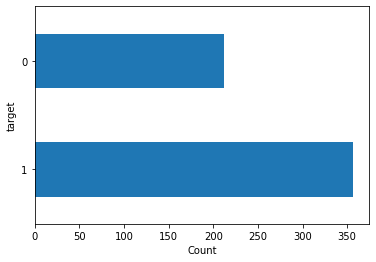

In [ ]:
# check data set is balanced or not
data['target'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("target")
plt.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop("target", axis = 1)
Y = data["target"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("target",axis = 1).columns)




In [ ]:

class Perceptron:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    #print('x',x)
    #print('w',self.w)
    #print('b',self.b)
    #print(self.w)
    return 1 if ((np.dot(self.w,x)) >= self.b) else 0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    X=np.array(X)
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs, lr):
    self.w = np.ones(X.shape[1])

    
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      X=np.array(X)
      Y=np.array(Y)
      for x, y in zip(X, Y):
        #print('x',x)
        #print('y',y)
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    #print('m',max_accuracy)
    #plot the accuracy values over epochs
    accu=list(accuracy.values())
    plt.plot(list(accu))
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
    print(type(wt_matrix))
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)


test_size = 0.3


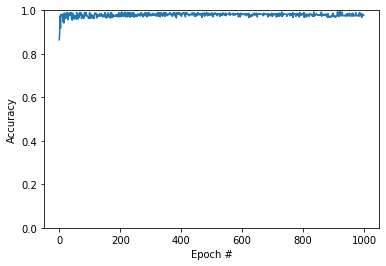

<class 'list'>
0.9532163742690059
test_size = 0.2


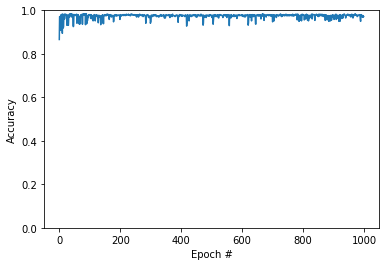

<class 'list'>
0.9824561403508771
test_size = 0.1


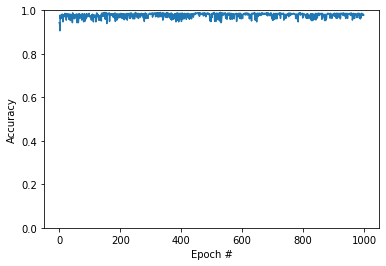

<class 'list'>
0.9649122807017544


In [ ]:
#train test split.
test_len=[0.3,0.2,0.1]
for t in test_len:
  print('test_size =', t)
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = t, stratify = Y, random_state = 1)


  perceptron = Perceptron()


  wt_matrix = perceptron.fit(X_train, Y_train, 1000, 0.3)
  Y_pred_test = perceptron.predict(X_test)
  
  print(accuracy_score(Y_pred_test, Y_test))



In [ ]:
########################################################################################################

# **3.Logistic Regression Classifier**

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

breast_cancer = sklearn.datasets.load_breast_cancer()


data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["target"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("target", axis = 1)
Y = data["target"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("target",axis = 1).columns)




In [ ]:

from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def __init__ (self):
      self.w = None
      self.b = None
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        #print(X.shape)
        #print(weights.shape)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs, lr):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        
        z = dot(X, self.weights)
        
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]


In [ ]:
#train test split.
test_len=[0.3,0.2,0.1]
for t in test_len:
  print('test_size =', t)
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = t, stratify = Y, random_state = 1)


  Logistic = LogisticRegression()


  wt_matrix = Logistic.fit(X_train, Y_train, 1000, 0.3)
 
  Y_pred_test = Logistic.predict(X_test)
  
  print(accuracy_score(Y_pred_test, Y_test))


test_size = 0.3
0.8947368421052632
test_size = 0.2
0.9122807017543859
test_size = 0.1
0.9298245614035088


In [ ]:
###########################################################################